## ANA 08 
### Dataset 1

In [1]:
# Librerías para tratamiento de datos
# ==============================================================================
import pandas as pd # Para trabajar con datos
import numpy as np # Para trabajar con matrices y arrays


# Librerías de los Algoritmos empleados
# ==============================================================================
import sklearn 
from sklearn.tree import DecisionTreeClassifier # Algoritmo de árboles de decisión 
from sklearn.ensemble import RandomForestClassifier # Algoritmo de Bosques Aleatorios


from sklearn import model_selection # Para dividir el conjunto de datos
from sklearn.metrics import classification_report # Para medir la precisión del modelo
from sklearn.metrics import confusion_matrix # Para crear una matriz de confusión
from sklearn.metrics import accuracy_score # Para calcular la precisión del modelo
from sklearn.model_selection import train_test_split # Para dividir el conjunto de datos
from sklearn.preprocessing import StandardScaler # Para estandarizar los datos

# Librerías para gráficos
# ==============================================================================
import matplotlib.pyplot as plt # Para gráficos
import seaborn as sns # Para gráficos

import sys  # Para versión de python entre otras cosas
%matplotlib inline  

## 1. Descripción del dataset
<p>
Aqui va la descripcion del dataset
</p>

## 2. Carga de datos

In [8]:
data = pd.read_csv('Churn_Modelling.csv') # Cargamos el dataset

Veamos ahora todas las columnas en los datos.

In [9]:
data.columns # Muestro las columnas del dataset

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

Aqui va una descripcion sobre los datos que continen las columnas y las variables.... 

In [10]:
data.tail(10) # Muestro las 10 últimas filas del dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9990,9991,15798964,Nkemakonam,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [11]:
data[data.isnull().any(axis=1)] # selecciono filas  (f i l a s por eso uso axis=1) que tengan valores null

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


###  2.1. Limpieza de datos

No necesitaremos un número para cada fila por lo que podemos eliminar esa columna

In [12]:
del data['RowNumber'] # borro la columna RowNumber ya que no la necesito

Eliminando los valores nulos

In [13]:
before_rows = data.shape[0] # guardo la forma de la tabla antes de la limpieza (para comparar luego)
print(before_rows)

10000


In [14]:
data = data.dropna() # borro las filas que tengan valores null

In [15]:
after_rows = data.shape[0] # guardo la forma de la tabla despues de la limpieza (para comparar luego)
print(after_rows) # imprimo la cantidad de filas antes y despues de la limpieza

10000


<p><br>
¿Cuántas filas cayeron debido a la limpieza?<br><br></p>

In [16]:
before_rows - after_rows # imprimo la cantidad de filas que se borraron

0

###  2.2. Preparación de datos

El objetivo lo guardamos en 'y'.

In [18]:
y=clean_data[['Exited']].copy() 

In [19]:
y.head() # imprimo el dataframe y

,Exited
0,1
1,0
2,1
3,0
4,0


<p><br>
Usaremos los datos de los clientes para predecir si salndrán o no de la organización
<br><br></p>


In [20]:
datos_clientes = [
"CustomerId",
"Surname",
"CreditScore",
"Geography",
"Gender",
"Age",
"Tenure",
"Balance",
"NumOfProducts",
"HasCrCard",
"IsActiveMember",
"EstimatedSalary",
] # creo una lista con las columnas que voy a usar para entrenar el modelo

In [21]:
X = clean_data[datos_clientes].copy() # creo un dataframe con las columnas de la lista datos_clientes

In [22]:
X.columns # imprimo las columnas del dataframe X

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary'],
      dtype='object')

In [23]:
y.columns # imprimo las columnas del dataframe y

Index(['Exited'], dtype='object')

In [24]:
print("Variables independientes:", X) # imprimo las variables independientes
print("\nVariable dependiente:", y) # imprimo la variable dependiente

Variables independientes:       CustomerId    Surname  CreditScore Geography  Gender  Age  Tenure  \
0       15634602   Hargrave          619    France  Female   42       2   
1       15647311       Hill          608     Spain  Female   41       1   
2       15619304       Onio          502    France  Female   42       8   
3       15701354       Boni          699    France  Female   39       1   
4       15737888   Mitchell          850     Spain  Female   43       2   
...          ...        ...          ...       ...     ...  ...     ...   
9995    15606229   Obijiaku          771    France    Male   39       5   
9996    15569892  Johnstone          516    France    Male   35      10   
9997    15584532        Liu          709    France  Female   36       7   
9998    15682355  Sabbatini          772   Germany    Male   42       3   
9999    15628319     Walker          792    France  Female   28       4   

        Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalar

## 3. División entrenamiento-test

<p><br>
Realizamos la partición de nuestro set de datos en set de entrenamiento y prueba
<br><br></p>

In [31]:
columnas_categoricas = ['Surname', 'Geography', 'Gender']

In [32]:
X_encoded = pd.get_dummies(X, columns=columnas_categoricas)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.33, random_state=324) # divido el dataset en train y test

In [34]:
# Escalamos las características
sc = StandardScaler() # creamos un objeto de la clase StandardScaler
X_train = sc.fit_transform(X_train) # escalamos los datos de entrenamiento
X_test = sc.transform(X_test) # escalamos los datos de test

In [35]:
#Imprimo los vectores de training y test
print("\nX Entrenamiento:",X_train) 
print("\ny test:",y_test)


X Entrenamiento: [[ 1.26875539 -1.27996643 -0.66303473 ... -0.56930719 -0.91109882
   0.91109882]
 [-0.33064204  0.80606669  0.00491348 ... -0.56930719 -0.91109882
   0.91109882]
 [ 1.4615524   1.85941014  0.48201934 ...  1.75652095  1.09757578
  -1.09757578]
 ...
 [-0.10557821 -0.51577608  0.38659817 ... -0.56930719  1.09757578
  -1.09757578]
 [-1.08510068 -1.29029333 -0.66303473 ... -0.56930719 -0.91109882
   0.91109882]
 [ 0.88141497  0.35168324 -0.7584559  ...  1.75652095 -0.91109882
   0.91109882]]

y test:       Exited
4158       0
1915       0
6225       0
8017       0
9847       0
...      ...
3386       0
7722       0
1864       0
8037       0
411        0

[3300 rows x 1 columns]


## 4. Arboles de Decisión (Decision Tree)

In [36]:
# creo el clasificador, 
modelo_dt = DecisionTreeClassifier(max_leaf_nodes=15, random_state=0) # creo el clasificador

In [37]:
# entrenamos con set de entrenamiento
modelo_dt.fit(X_train, y_train) # entrenamos el modelo

DecisionTreeClassifier(max_leaf_nodes=15, random_state=0)

###  4.2. Validación del modelo

Predecimos con el set de test

In [38]:
# Predicción del set de Test
y_pred = modelo_dt.predict(X_test)

# Muestro las 5 primeras predicciones
print(y_pred[0:5])

[0 0 0 1 0]


In [39]:
algoritmo = 'Arboles de Decisión (Decision Tree)'
#Calculo score del modelo con el set de entrenamiento
train_score = modelo_dt.score(X_train, y_train)
#Calculo score del modelo con el set de prueba
test_score = modelo_dt.score(X_test, y_test)

print("{} precisión del set de entrenamiento: {}".format(algoritmo, train_score))
print("{} precisión del set de prueba: {}".format(algoritmo, test_score))

Arboles de Decisión (Decision Tree) precisión del set de entrenamiento: 0.855820895522388
Arboles de Decisión (Decision Tree) precisión del set de prueba: 0.8566666666666667


###  4.3. Matriz de confusión

In [40]:
cm = confusion_matrix(y_test, y_pred) # creo la matriz de confusión

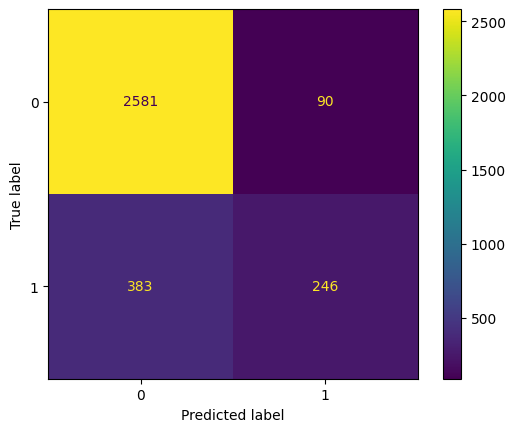

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay # importo la librería para mostrar la matriz de confusión
disp= ConfusionMatrixDisplay (confusion_matrix=cm)  # creo el objeto para mostrar la matriz de confusión
disp.plot()  # muestro la matriz de confusión
plt.show() # muestro el gráfico

In [42]:
print(classification_report(y_test, y_pred)) # imprimo el reporte de clasificación

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2671
           1       0.73      0.39      0.51       629

    accuracy                           0.86      3300
   macro avg       0.80      0.68      0.71      3300
weighted avg       0.84      0.86      0.84      3300



## 5. Bosques Aleatorios (Random Forest)

In [43]:
modelo_rf = RandomForestClassifier() # creo el clasificador

In [44]:
#entrenamos con set de entrenamiento
modelo_rf.fit(X_train, y_train) # entrenamos el modelo

c:\Users\carol\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

###  5.2. Validación del modelo

In [45]:
# Predicción del set de Test
y_pred = modelo_rf.predict(X_test)

# Muestro las 5 primeras predicciones
print(y_pred[0:5])

[0 0 0 1 0]


In [46]:
algoritmo = 'Random Forest (Bosques Aleatorios)'
#Calculo score del modelo con el set de entrenamiento
train_score = modelo_rf.score(X_train, y_train)
#Calculo score del modelo con el set de prueba
test_score = modelo_rf.score(X_test, y_test)

print("{} precisión del set de entrenamiento: {}".format(algoritmo, train_score))
print("{} precisión del set de prueba: {}".format(algoritmo, test_score))

Random Forest (Bosques Aleatorios) precisión del set de entrenamiento: 1.0
Random Forest (Bosques Aleatorios) precisión del set de prueba: 0.8590909090909091


###  5.3. Matriz de confusión

In [47]:
cm = confusion_matrix(y_test, y_pred) # creo la matriz de confusión

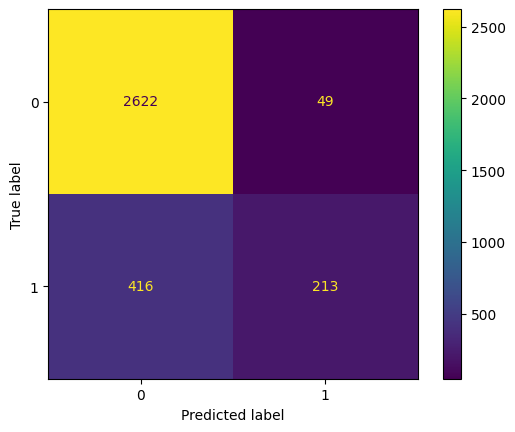

In [48]:
from sklearn.metrics import ConfusionMatrixDisplay # importo la librería para mostrar la matriz de confusión
disp= ConfusionMatrixDisplay (confusion_matrix=cm)  # creo el objeto para mostrar la matriz de confusión
disp.plot()  # muestro la matriz de confusión
plt.show() # muestro el gráfico